<a href="https://colab.research.google.com/github/zooodung/TA-Prediction/blob/woogie/Preprocess_OneHotlEncoding_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='/content/drive/MyDrive/camp/project1/open/'

In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


daegu_data=pd.read_csv('/content/drive/MyDrive/open/open/train.csv')
wide_data=pd.read_csv('/content/drive/MyDrive/open/open/external_open/countrywide_accident.csv')
test_data=pd.read_csv('/content/drive/MyDrive/open/open/test.csv')
daegu_data.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [4]:
columns_to_drop = ['ID', '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
                   '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']

daegu=daegu_data.drop(columns=columns_to_drop)



In [5]:
daegu[['년도','월','일+시간']] = daegu['사고일시'].str.split('-',expand=True)
daegu[['일','시간']]= daegu['일+시간'].str.split(' ',expand=True)
daegu.drop(['일+시간','사고일시'],inplace=True, axis=1)

In [6]:
daegu[['시','구','동']] = daegu['시군구'].str.split(' ',expand=True)
daegu.drop(['시군구'],inplace=True, axis=1)

In [7]:
daegu[['도로형태1', '도로형태2']] = daegu['도로형태'].str.split(' - ', expand=True)
daegu.drop(['도로형태'],inplace=True, axis=1)

In [8]:
daegu.drop(['일'],inplace=True, axis=1)

In [ ]:
daegu.head()

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,시,구,동,도로형태1,도로형태2
0,화요일,맑음,건조,차대사람,0,1,0,0,5,2019,01,00,대구광역시,중구,대신동,단일로,기타
1,화요일,흐림,건조,차대사람,0,0,1,0,3,2019,01,00,대구광역시,달서구,감삼동,단일로,기타
2,화요일,맑음,건조,차대사람,0,0,1,0,3,2019,01,01,대구광역시,수성구,두산동,단일로,기타
3,화요일,맑음,건조,차대차,0,1,0,0,5,2019,01,02,대구광역시,북구,복현동,단일로,기타
4,화요일,맑음,건조,차대차,0,0,1,0,3,2019,01,04,대구광역시,동구,신암동,단일로,기타


In [9]:
wide=wide_data.copy()
len(wide)

602775

In [10]:
wide = wide[~wide['도로형태'].str.split().str[-1].str.contains('철길건널목')]
len(wide)

602763

In [11]:
wide=wide.drop(columns=columns_to_drop)

In [12]:
def contains_specific_location(address):
    cities = ['서울특별시', '인천광역시', '부산광역시']
    for city in cities:
        if city in address:
            return True
    return False
wide=wide[wide['시군구'].apply(contains_specific_location)]

In [13]:
wide['시군구'].apply(lambda x:x.split()[0]).value_counts()

서울특별시    108395
부산광역시     36244
인천광역시     25115
Name: 시군구, dtype: int64

In [14]:
wide[['년도','월','일+시간']] = wide['사고일시'].str.split('-',expand=True)
wide[['일','시간']]= wide['일+시간'].str.split(' ',expand=True)
wide.drop(['일+시간','사고일시'],inplace=True, axis=1)

In [15]:
wide[['시','구','동']] = wide['시군구'].str.split(' ',expand=True)
wide.drop(['시군구'],inplace=True, axis=1)

In [16]:
wide[['도로형태1', '도로형태2']] = wide['도로형태'].str.split(' - ', expand=True)
wide.drop(['도로형태'],inplace=True, axis=1)

In [17]:
wide.drop(['일'],inplace=True, axis=1)

In [18]:
wide.head()

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,시,구,동,도로형태1,도로형태2
0,화요일,맑음,건조,차대사람,0,0,1,0,3,2019,01,00,서울특별시,강서구,방화동,교차로,교차로횡단보도내
4,화요일,맑음,건조,차대차,0,0,2,1,7,2019,01,00,인천광역시,부평구,부평동,교차로,교차로안
5,화요일,맑음,건조,차대사람,0,0,1,0,3,2019,01,00,인천광역시,부평구,부평동,교차로,교차로부근
11,화요일,맑음,건조,차대사람,1,0,0,0,10,2019,01,00,부산광역시,해운대구,우동,교차로,교차로안
12,화요일,맑음,건조,차대차,0,1,0,0,5,2019,01,00,부산광역시,남구,대연동,교차로,교차로부근


데이터 합병

In [19]:
print(len(daegu),len(wide), len(daegu)+len(wide))

39609 169754 209363


In [20]:
concatenated_df = pd.concat([daegu, wide])
concatenated_df

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,시,구,동,도로형태1,도로형태2
0,화요일,맑음,건조,차대사람,0,1,0,0,5,2019,01,00,대구광역시,중구,대신동,단일로,기타
1,화요일,흐림,건조,차대사람,0,0,1,0,3,2019,01,00,대구광역시,달서구,감삼동,단일로,기타
2,화요일,맑음,건조,차대사람,0,0,1,0,3,2019,01,01,대구광역시,수성구,두산동,단일로,기타
3,화요일,맑음,건조,차대차,0,1,0,0,5,2019,01,02,대구광역시,북구,복현동,단일로,기타
4,화요일,맑음,건조,차대차,0,0,1,0,3,2019,01,04,대구광역시,동구,신암동,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602761,금요일,맑음,건조,차대차,0,1,0,0,5,2021,12,23,인천광역시,미추홀구,주안동,단일로,기타
602766,금요일,맑음,건조,차대사람,0,0,1,0,3,2021,12,23,서울특별시,서초구,반포동,단일로,기타
602769,금요일,맑음,건조,차대차,0,1,0,0,5,2021,12,23,부산광역시,연제구,연산동,단일로,기타
602770,금요일,흐림,건조,차대차,0,1,1,0,8,2021,12,23,부산광역시,해운대구,우동,교차로,교차로안


In [21]:
concatenated_df['주말여부']=concatenated_df['요일'].apply(lambda x:'주말' if x in ['토요일','일요일'] else '평일')
# concatenated_df.head()
concatenated_df['주말여부'].value_counts()

평일    157197
주말     52166
Name: 주말여부, dtype: int64

In [22]:
def seperate_time(time): #심야, 새벽, 오전, 점심, 오후, 저녁, 야간 ->4시간단위
    if 0<=int(time)<4:
        return '심야'
    elif int(time)<8:
        return '새벽'
    elif int(time)<12:
        return '오전'
    elif int(time)<16:
        return '오후'
    elif int(time)<20:
        return '저녁'
    else:
        return '야간'
concatenated_df['시간구분']=concatenated_df['시간'].apply(seperate_time)
print(concatenated_df['시간구분'].value_counts().sum())
concatenated_df['시간구분'].value_counts()

209363


저녁    55821
오후    46336
오전    39134
야간    37477
새벽    15998
심야    14597
Name: 시간구분, dtype: int64

In [23]:
def seperate_month(month):
    if int(month) in [12,1,2]:
        return '겨울'
    elif int(month) in [3,4,5]:
        return '봄'
    elif int(month) in [6,7,8]:
        return '여름'
    else:
        return '가을'
concatenated_df['계절']=concatenated_df['월'].apply(seperate_month)
print(concatenated_df['계절'].value_counts().sum())
concatenated_df['계절'].value_counts()

209363


가을    54912
여름    53663
봄     52029
겨울    48759
Name: 계절, dtype: int64

In [24]:
concatenated_df

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,시,구,동,도로형태1,도로형태2,주말여부,시간구분,계절
0,화요일,맑음,건조,차대사람,0,1,0,0,5,2019,01,00,대구광역시,중구,대신동,단일로,기타,평일,심야,겨울
1,화요일,흐림,건조,차대사람,0,0,1,0,3,2019,01,00,대구광역시,달서구,감삼동,단일로,기타,평일,심야,겨울
2,화요일,맑음,건조,차대사람,0,0,1,0,3,2019,01,01,대구광역시,수성구,두산동,단일로,기타,평일,심야,겨울
3,화요일,맑음,건조,차대차,0,1,0,0,5,2019,01,02,대구광역시,북구,복현동,단일로,기타,평일,심야,겨울
4,화요일,맑음,건조,차대차,0,0,1,0,3,2019,01,04,대구광역시,동구,신암동,단일로,기타,평일,새벽,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602761,금요일,맑음,건조,차대차,0,1,0,0,5,2021,12,23,인천광역시,미추홀구,주안동,단일로,기타,평일,야간,겨울
602766,금요일,맑음,건조,차대사람,0,0,1,0,3,2021,12,23,서울특별시,서초구,반포동,단일로,기타,평일,야간,겨울
602769,금요일,맑음,건조,차대차,0,1,0,0,5,2021,12,23,부산광역시,연제구,연산동,단일로,기타,평일,야간,겨울
602770,금요일,흐림,건조,차대차,0,1,1,0,8,2021,12,23,부산광역시,해운대구,우동,교차로,교차로안,평일,야간,겨울


#test data


In [25]:
test=test_data.copy()

In [26]:
test[['년도','월','일+시간']] = test['사고일시'].str.split('-',expand=True)
test[['일','시간']]= test['일+시간'].str.split(' ',expand=True)
test.drop(['일+시간','사고일시'],inplace=True, axis=1)

In [27]:
test[['시','구','동']] = test['시군구'].str.split(' ',expand=True)
test.drop(['시군구'],inplace=True, axis=1)

In [28]:
test[['도로형태1', '도로형태2']] = test['도로형태'].str.split(' - ', expand=True)
test.drop(['도로형태'],inplace=True, axis=1)

In [29]:
test['주말여부']=test['요일'].apply(lambda x:'주말' if x in ['토요일','일요일'] else '평일')
# test.head()
test['주말여부'].value_counts()

평일    8157
주말    2806
Name: 주말여부, dtype: int64

In [30]:
test['시간구분']=test['시간'].apply(seperate_time)
print(test['시간구분'].value_counts().sum())
test['시간구분'].value_counts()

10963


저녁    3168
오후    2548
오전    2196
야간    1765
새벽     708
심야     578
Name: 시간구분, dtype: int64

In [31]:
test['계절']=test['월'].apply(seperate_month)
print(test['계절'].value_counts().sum())
test['계절'].value_counts()

10963


가을    2947
여름    2783
봄     2771
겨울    2462
Name: 계절, dtype: int64

In [32]:
test.drop('ID',axis=1,inplace=True)
test.drop('일',axis=1,inplace=True)

#문자열로 된 숫자 정수형으로 변환

In [33]:
test['년도'] = test['년도'].astype(int)
test['월'] = test['월'].astype(int)
test['시간'] = test['시간'].astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      10963 non-null  object
 1   기상상태    10963 non-null  object
 2   노면상태    10963 non-null  object
 3   사고유형    10963 non-null  object
 4   년도      10963 non-null  int64 
 5   월       10963 non-null  int64 
 6   시간      10963 non-null  int64 
 7   시       10963 non-null  object
 8   구       10963 non-null  object
 9   동       10963 non-null  object
 10  도로형태1   10963 non-null  object
 11  도로형태2   10963 non-null  object
 12  주말여부    10963 non-null  object
 13  시간구분    10963 non-null  object
 14  계절      10963 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.3+ MB


In [34]:
concatenated_df['년도'] = concatenated_df['년도'].astype(int)
concatenated_df['월'] = concatenated_df['월'].astype(int)
concatenated_df['시간'] = concatenated_df['시간'].astype(int)
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209363 entries, 0 to 602771
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   요일      209363 non-null  object
 1   기상상태    209363 non-null  object
 2   노면상태    209363 non-null  object
 3   사고유형    209363 non-null  object
 4   사망자수    209363 non-null  int64 
 5   중상자수    209363 non-null  int64 
 6   경상자수    209363 non-null  int64 
 7   부상자수    209363 non-null  int64 
 8   ECLO    209363 non-null  int64 
 9   년도      209363 non-null  int64 
 10  월       209363 non-null  int64 
 11  시간      209363 non-null  int64 
 12  시       209363 non-null  object
 13  구       209363 non-null  object
 14  동       209363 non-null  object
 15  도로형태1   209363 non-null  object
 16  도로형태2   209363 non-null  object
 17  주말여부    209363 non-null  object
 18  시간구분    209363 non-null  object
 19  계절      209363 non-null  object
dtypes: int64(8), object(12)
memory usage: 33.5+ MB


In [35]:
concatenated_df

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,시,구,동,도로형태1,도로형태2,주말여부,시간구분,계절
0,화요일,맑음,건조,차대사람,0,1,0,0,5,2019,1,0,대구광역시,중구,대신동,단일로,기타,평일,심야,겨울
1,화요일,흐림,건조,차대사람,0,0,1,0,3,2019,1,0,대구광역시,달서구,감삼동,단일로,기타,평일,심야,겨울
2,화요일,맑음,건조,차대사람,0,0,1,0,3,2019,1,1,대구광역시,수성구,두산동,단일로,기타,평일,심야,겨울
3,화요일,맑음,건조,차대차,0,1,0,0,5,2019,1,2,대구광역시,북구,복현동,단일로,기타,평일,심야,겨울
4,화요일,맑음,건조,차대차,0,0,1,0,3,2019,1,4,대구광역시,동구,신암동,단일로,기타,평일,새벽,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602761,금요일,맑음,건조,차대차,0,1,0,0,5,2021,12,23,인천광역시,미추홀구,주안동,단일로,기타,평일,야간,겨울
602766,금요일,맑음,건조,차대사람,0,0,1,0,3,2021,12,23,서울특별시,서초구,반포동,단일로,기타,평일,야간,겨울
602769,금요일,맑음,건조,차대차,0,1,0,0,5,2021,12,23,부산광역시,연제구,연산동,단일로,기타,평일,야간,겨울
602770,금요일,흐림,건조,차대차,0,1,1,0,8,2021,12,23,부산광역시,해운대구,우동,교차로,교차로안,평일,야간,겨울


#원 핫 인코딩

train-set

In [36]:
total_data = pd.concat([concatenated_df, test])
total_data = pd.get_dummies(total_data)

In [37]:
for c in total_data.columns:
    print(c)

사망자수
중상자수
경상자수
부상자수
ECLO
년도
월
시간
요일_금요일
요일_목요일
요일_수요일
요일_월요일
요일_일요일
요일_토요일
요일_화요일
기상상태_기타
기상상태_눈
기상상태_맑음
기상상태_비
기상상태_안개
기상상태_흐림
노면상태_건조
노면상태_기타
노면상태_서리/결빙
노면상태_적설
노면상태_젖음/습기
노면상태_침수
노면상태_해빙
사고유형_차대사람
사고유형_차대차
사고유형_차량단독
시_대구광역시
시_부산광역시
시_서울특별시
시_인천광역시
구_강남구
구_강동구
구_강북구
구_강서구
구_강화군
구_계양구
구_관악구
구_광진구
구_구로구
구_금정구
구_금천구
구_기장군
구_남구
구_남동구
구_노원구
구_달서구
구_달성군
구_도봉구
구_동구
구_동대문구
구_동래구
구_동작구
구_마포구
구_미추홀구
구_부산진구
구_부평구
구_북구
구_사상구
구_사하구
구_서구
구_서대문구
구_서초구
구_성동구
구_성북구
구_송파구
구_수성구
구_수영구
구_양천구
구_연수구
구_연제구
구_영도구
구_영등포구
구_옹진군
구_용산구
구_은평구
구_종로구
구_중구
구_중랑구
구_해운대구
동_가락동
동_가리봉동
동_가산동
동_가야동
동_가양동
동_가정동
동_가좌동
동_가창면
동_가천동
동_가회동
동_각산동
동_간석동
동_갈산동
동_갈월동
동_갈현동
동_감만동
동_감삼동
동_감전동
동_감천동
동_강동동
동_강일동
동_강화읍
동_개금동
동_개봉동
동_개포동
동_개화동
동_거여동
동_거제동
동_검단동
동_검사동
동_검암동
동_견지동
동_경동
동_경서동
동_경운동
동_계동
동_계산동
동_계산동1가
동_계산동2가
동_고덕동
동_고모동
동_고성동1가
동_고성동2가
동_고성동3가
동_고잔동
동_고척동
동_공덕동
동_공릉동
동_공촌동
동_공평동
동_공항동
동_과해동
동_관교동
동_관동1가
동_관동2가
동_관동3가
동_관수동
동_관음동
동_관철동
동_관훈동
동_광복동1가
동_광복동2가
동_광안동
동_광장동
동_광희동1가
동_광희동2가
동_괘법동
동_괴전동
동_괴정동
동_교남동
동_교동
동_교동면
동_교

In [38]:
train_data = total_data[~total_data['ECLO'].isnull()]
test_data = total_data[total_data['ECLO'].isnull()]

In [39]:
test_data = test_data.drop(['사망자수','중상자수','경상자수','부상자수','ECLO'], axis=1)

In [40]:
train_data

,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,요일_금요일,요일_목요일,...,시간구분_새벽,시간구분_심야,시간구분_야간,시간구분_오전,시간구분_오후,시간구분_저녁,계절_가을,계절_겨울,계절_봄,계절_여름
0,0.0,1.0,0.0,0.0,5.0,2019,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.0,0.0,1.0,0.0,3.0,2019,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0.0,0.0,1.0,0.0,3.0,2019,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.0,1.0,0.0,0.0,5.0,2019,1,2,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.0,0.0,1.0,0.0,3.0,2019,1,4,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602761,0.0,1.0,0.0,0.0,5.0,2021,12,23,1,0,...,0,0,1,0,0,0,0,1,0,0
602766,0.0,0.0,1.0,0.0,3.0,2021,12,23,1,0,...,0,0,1,0,0,0,0,1,0,0
602769,0.0,1.0,0.0,0.0,5.0,2021,12,23,1,0,...,0,0,1,0,0,0,0,1,0,0
602770,0.0,1.0,1.0,0.0,8.0,2021,12,23,1,0,...,0,0,1,0,0,0,0,1,0,0


In [41]:
test_data

,년도,월,시간,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,...,시간구분_새벽,시간구분_심야,시간구분_야간,시간구분_오전,시간구분_오후,시간구분_저녁,계절_가을,계절_겨울,계절_봄,계절_여름
0,2022,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,2022,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,2022,1,4,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,2022,1,4,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,2022,1,6,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,2022,12,18,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10959,2022,12,18,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10960,2022,12,20,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
10961,2022,12,20,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [44]:
corr = train_data.corr()
corr = corr.apply(lambda x: round(x,2))
corr

,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,요일_금요일,요일_목요일,...,시간구분_새벽,시간구분_심야,시간구분_야간,시간구분_오전,시간구분_오후,시간구분_저녁,계절_가을,계절_겨울,계절_봄,계절_여름
사망자수,1.00,-0.02,-0.07,-0.02,0.21,0.00,0.00,-0.03,-0.00,0.00,...,0.04,0.03,-0.00,-0.01,-0.01,-0.03,0.00,0.00,-0.00,-0.00
중상자수,-0.02,1.00,-0.33,-0.08,0.49,-0.03,-0.01,-0.03,-0.01,-0.00,...,0.03,0.02,0.00,-0.01,-0.01,-0.02,0.00,-0.00,0.01,-0.01
경상자수,-0.07,-0.33,1.00,-0.13,0.60,0.01,-0.00,0.01,-0.01,-0.02,...,-0.02,0.01,0.02,-0.01,-0.00,0.00,-0.00,0.00,0.00,0.00
부상자수,-0.02,-0.08,-0.13,1.00,-0.07,-0.03,0.00,0.00,-0.00,-0.01,...,-0.01,0.01,0.00,-0.01,0.00,0.01,-0.00,-0.00,-0.00,0.01
ECLO,0.21,0.49,0.60,-0.07,1.00,-0.02,-0.01,-0.02,-0.01,-0.02,...,0.02,0.04,0.02,-0.02,-0.01,-0.02,-0.00,-0.00,0.01,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
시간구분_저녁,-0.03,-0.02,0.00,0.01,-0.02,0.02,0.02,0.38,0.02,0.00,...,-0.17,-0.17,-0.28,-0.29,-0.32,1.00,0.02,0.01,-0.01,-0.01
계절_가을,0.00,0.00,-0.00,-0.00,-0.00,-0.01,0.59,-0.00,-0.00,-0.00,...,0.00,-0.01,-0.02,0.00,-0.00,0.02,1.00,-0.33,-0.34,-0.35
계절_겨울,0.00,-0.00,0.00,-0.00,-0.00,0.01,-0.24,0.01,-0.00,0.01,...,0.01,-0.00,0.01,-0.02,-0.00,0.01,-0.33,1.00,-0.32,-0.32
계절_봄,-0.00,0.01,0.00,-0.00,0.01,0.00,-0.44,-0.00,0.00,-0.00,...,-0.00,0.00,0.01,0.01,0.00,-0.01,-0.34,-0.32,1.00,-0.34


In [42]:
corr_df = test_data.corr()
corr_df = corr_df.apply(lambda x: round(x,2))
corr_df

,년도,월,시간,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,...,시간구분_새벽,시간구분_심야,시간구분_야간,시간구분_오전,시간구분_오후,시간구분_저녁,계절_가을,계절_겨울,계절_봄,계절_여름
년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
월,NaN,1.00,-0.02,-0.01,0.01,0.01,-0.02,-0.01,0.02,-0.00,...,0.01,0.02,-0.03,-0.00,-0.02,0.02,0.60,-0.23,-0.44,0.05
시간,NaN,-0.02,1.00,0.02,0.01,0.00,0.01,-0.02,-0.01,-0.01,...,-0.38,-0.55,0.58,-0.41,-0.04,0.41,-0.00,0.03,-0.01,-0.02
요일_금요일,NaN,-0.01,0.02,1.00,-0.18,-0.18,-0.18,-0.15,-0.18,-0.18,...,-0.01,-0.01,0.00,0.00,-0.03,0.03,-0.01,0.02,0.00,-0.02
요일_목요일,NaN,0.01,0.01,-0.18,1.00,-0.17,-0.17,-0.14,-0.18,-0.17,...,0.01,-0.03,-0.00,-0.00,0.02,-0.00,0.01,0.02,-0.02,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
시간구분_저녁,NaN,0.02,0.41,0.03,-0.00,0.00,0.02,-0.02,-0.03,-0.01,...,-0.17,-0.15,-0.28,-0.32,-0.35,1.00,0.04,-0.01,-0.00,-0.03
계절_가을,NaN,0.60,-0.00,-0.01,0.01,0.01,-0.01,-0.01,0.00,-0.00,...,0.00,-0.00,-0.03,-0.01,-0.00,0.04,1.00,-0.33,-0.35,-0.35
계절_겨울,NaN,-0.23,0.03,0.02,0.02,-0.03,0.01,0.00,-0.01,-0.01,...,-0.02,-0.02,0.02,-0.01,0.03,-0.01,-0.33,1.00,-0.31,-0.31
계절_봄,NaN,-0.44,-0.01,0.00,-0.02,-0.01,0.01,0.00,0.01,0.01,...,-0.00,0.00,-0.00,0.01,-0.00,-0.00,-0.35,-0.31,1.00,-0.34


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


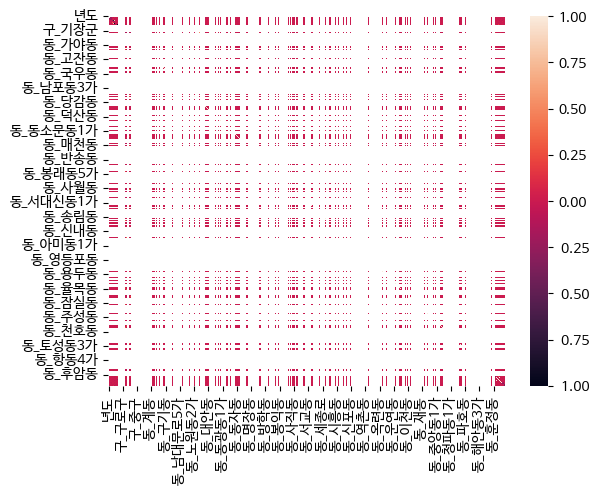

In [43]:
ax = sns.heatmap(corr_df)
plt.show()

In [ ]:
test_data['시_인천광역시'].sum()

0

In [ ]:
test_data['시_서울특별시'].sum()

0

In [ ]:
test_data['시_부산광역시'].sum()

0